In [126]:
import pandas as pd
from decimal import Decimal, ROUND_HALF_UP

In [142]:
table = pd.read_csv("table.csv").round(decimals=5)
table = table.dropna()
table = table.drop([14])
table

,n_hidden_layers,hidden_size,epochs,data_size,train_loss,val_loss,val_loss_initial_data,val_loss_boundary_data,val_loss_collocation,elapsed_time
0,3.0,80.0,50.0,80.0,0.00302,0.00273,0.00052,0.00058,0.00163,126.39080
1,3.0,80.0,50.0,100.0,0.00846,0.00896,0.00386,0.00235,0.00275,128.86500
2,3.0,80.0,50.0,120.0,0.00988,0.00888,0.00297,0.00267,0.00324,128.14302
3,3.0,100.0,50.0,80.0,0.00207,0.00177,0.00018,0.00041,0.00118,159.69676
4,3.0,100.0,50.0,100.0,0.00846,0.00848,0.00297,0.00230,0.00321,159.56959
6,3.0,120.0,50.0,80.0,0.01059,0.01296,0.00644,0.00328,0.00323,183.63768
7,3.0,120.0,50.0,100.0,0.00562,0.00560,0.00182,0.00112,0.00267,183.31877
8,3.0,120.0,50.0,120.0,0.00600,0.00555,0.00134,0.00131,0.00291,183.65893
9,5.0,80.0,50.0,80.0,0.01616,0.01418,0.00534,0.00428,0.00455,222.67580
10,5.0,80.0,50.0,100.0,0.01325,0.01270,0.00491,0.00311,0.00468,223.07073


In [143]:
table.to_csv("processed_table.csv")

In [151]:
# buscando melhor razão loss/training_time

table['lossPtraining_time'] = table['val_loss'] * table['elapsed_time']
table['val_loss_dataOval_loss_col'] = table['val_loss_initial_data'] / table['val_loss_collocation']


print("=== MELHOR RELAÇÃO TEMPO X LOSS")
print(table[table.lossPtraining_time == table.lossPtraining_time.min()])
print("\n")
print("\n")

print("=== LIMITES NA RELAÇÃO loss_initial_data / loss_collocation")
print("= MIN")
print("\n")
print(table[table.val_loss_dataOval_loss_col == table.val_loss_dataOval_loss_col.min()])
print("\n")
print("\n")
print("= MAX")
print("\n")
print(table[table.val_loss_dataOval_loss_col == table.val_loss_dataOval_loss_col.max()])


table[table.lossPtraining_time == table.lossPtraining_time.min()].to_csv("best_config.csv")

=== MELHOR RELAÇÃO TEMPO X LOSS
   n_hidden_layers  hidden_size  epochs  data_size  train_loss  val_loss  \
3              3.0        100.0    50.0       80.0     0.00207   0.00177   

   val_loss_initial_data  val_loss_boundary_data  val_loss_collocation  \
3                0.00018                 0.00041               0.00118   

   elapsed_time  lossPtraining_time  val_loss_dataOval_loss_col  
3     159.69676            0.282663                    0.152542  




=== LIMITES NA RELAÇÃO loss_initial_data / loss_collocation
= MIN


   n_hidden_layers  hidden_size  epochs  data_size  train_loss  val_loss  \
3              3.0        100.0    50.0       80.0     0.00207   0.00177   

   val_loss_initial_data  val_loss_boundary_data  val_loss_collocation  \
3                0.00018                 0.00041               0.00118   

   elapsed_time  lossPtraining_time  val_loss_dataOval_loss_col  
3     159.69676            0.282663                    0.152542  




= MAX


    n_hidden_lay

descobri umas tendencias:
- mais dados faz o algoritmo priorizar minimizar erro nos dados iniciais, em especial com arquiteturas mais parrudas
- quando a arquitetura é menor e tem menos dados, a rede dende a minimizar mais nos pontos de collocation

In [58]:
# buscando efeito marginal dos dados

#esse nao sei como faz ainda

## Brincando com os plots

In [59]:
import matplotlib.pyplot as plt

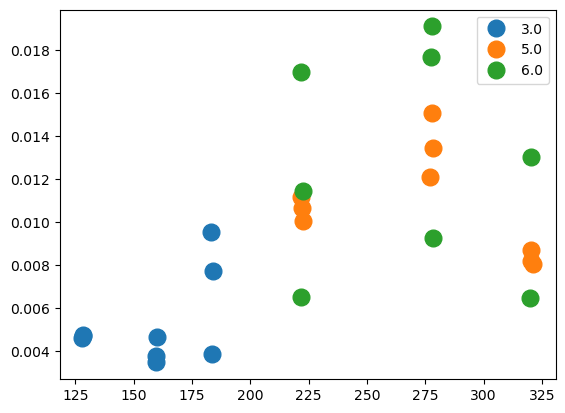

In [101]:
groups = table.groupby('n_hidden_layers')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.training_time, group.loss, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()


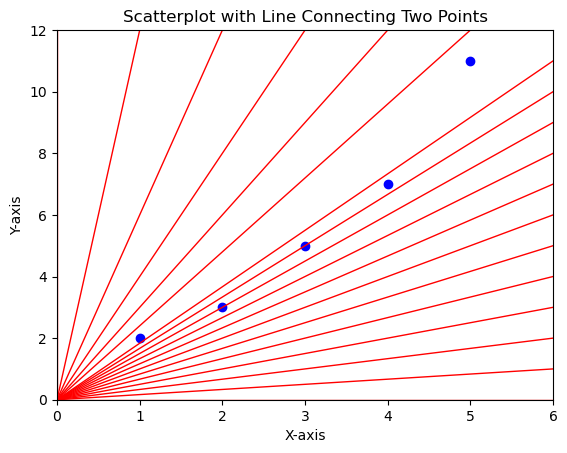

In [90]:
import matplotlib.pyplot as plt

# Sample data for the scatterplot
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create the scatterplot
plt.scatter(x, y, color='blue')

# Define the points to connect with a line (e.g., first and last points)
x_line = [0, 4]
y_line = [0, 5]

# Add the line connecting the two points
for i in range(0, max(x) + 1):
    plt.plot([0, i], [0, max(y) + 1], color='red', linestyle='-', linewidth=1)
for j in range(0, max(y) + 1):
    plt.plot([0, max(x) + 1], [0, j], color='red', linestyle='-', linewidth=1)
    
# Set the limits of the plot
plt.xlim(0, max(x) + 1)
plt.ylim(0, max(y) + 1)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatterplot with Line Connecting Two Points')

#plt.tight_layout()

# Display the plot
plt.show()

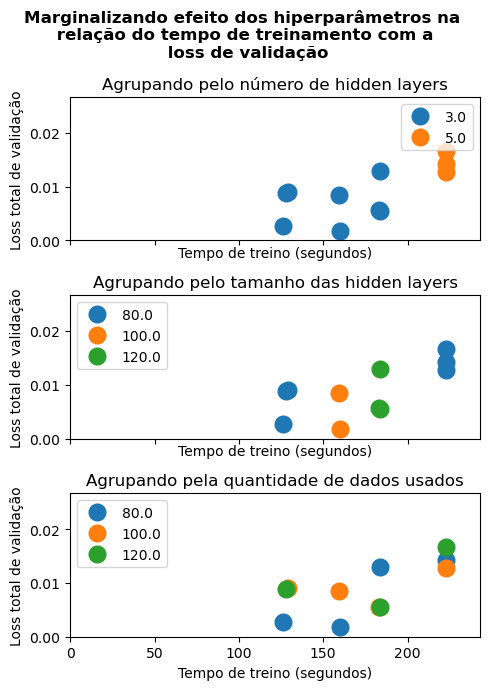

In [177]:
import matplotlib.pyplot as plt
# Create a 3x1 grid of subplots

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 7), sharex=True, sharey=True)

fig.suptitle("Marginalizando efeito dos hiperparâmetros na \n relação do tempo de treinamento com a \n loss de validação", fontweight='bold')
# Plot the data in each subplot
for i in range(3):
    
    
    # nao faço ideia do motivo, mas os títulos estao embaralhando
    
    if i == 0:
        groups = table.groupby('n_hidden_layers')
        plt.title("Agrupando pela quantidade de dados usados")
    elif i == 1:
        groups = table.groupby('hidden_size')
        plt.title("Agrupando pelo número de hidden layers")        
    elif i == 2:
        groups = table.groupby('data_size')
        plt.title("Agrupando pelo tamanho das hidden layers")
    else:
        raise Exception('Tu não sabe programar?')
    
    
    plt.subplot(3, 1, i+1)
    
    for name, group in groups:
        plt.plot(group.elapsed_time, group.val_loss, marker='o', linestyle='', ms=12, label=name)
    
    plt.xlabel('Tempo de treino (segundos)')
    plt.ylabel('Loss total de validação')
    
    plt.xlim(0, max(group.elapsed_time) + 20)
    plt.ylim(0, max(group.val_loss) + 0.01)
    
    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("../figures/marginalizations_hyperparameters.png")

# Show the plot
plt.show()

tendencias:
- mais dados faz o algoritmo priorizar minimizar erro nos dados iniciais, em especial com arquiteturas mais parrudas
- quando a arquitetura é menor e tem menos dados, a rede dende a minimizar mais nos pontos de collocation

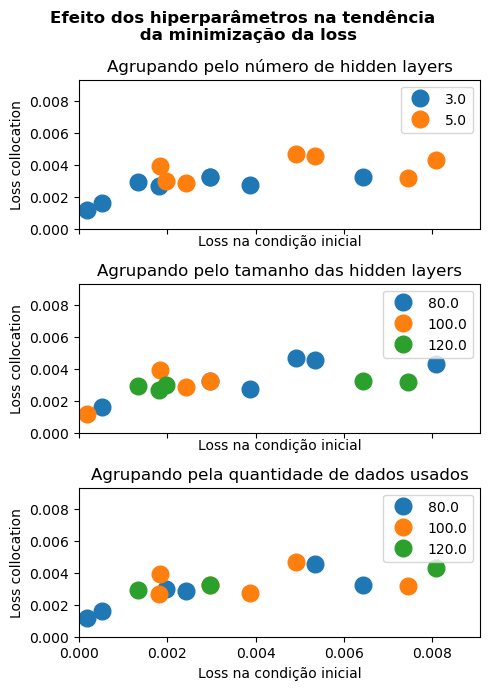

In [178]:
import matplotlib.pyplot as plt
# Create a 3x1 grid of subplots

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 7), sharex=True, sharey=True)

fig.suptitle("Efeito dos hiperparâmetros na tendência \n da minimização da loss", fontweight='bold')
# Plot the data in each subplot
for i in range(3):
    
    
    # nao faço ideia do motivo, mas os títulos estao embaralhando
    
    if i == 0:
        groups = table.groupby('n_hidden_layers')
        plt.title("Agrupando pela quantidade de dados usados")
    elif i == 1:
        groups = table.groupby('hidden_size')
        plt.title("Agrupando pelo número de hidden layers")        
    elif i == 2:
        groups = table.groupby('data_size')
        plt.title("Agrupando pelo tamanho das hidden layers")
    else:
        raise Exception('Tu não sabe programar?')
    
    
    plt.subplot(3, 1, i+1)
    
    for name, group in groups:
        plt.plot(group.val_loss_initial_data, group.val_loss_collocation, marker='o', linestyle='', ms=12, label=name)
    
    plt.xlabel('Loss na condição inicial')
    plt.ylabel('Loss collocation')
    
    plt.xlim(0, max(group.val_loss_initial_data) + 0.001)
    plt.ylim(0, max(group.val_loss_collocation) + 0.005)
    
    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("../figures/marginalizations_MSE_proportions.png")

# Show the plot
plt.show()

a tendência observada aqui é que 
- quando aumenta a quantidade de hidden layers, observa-se que o erro nas condições iniciais é minimizado com mais força
- no caso do tamanho das hidden layers, a configuração intermediária dá proporcionalmente mais foco a satisfazer a EDP
- quanto à quantidade de dados utilizados, quando eles eram pouquíssimos a tendencia era focar mais em minimizar o erro nos collocation points; aumentando um pouco a quantidade de dados nao existe uma tendencia evidente

## procurando configurações com os melhores resultados no conjunto de validação